In [1]:
import pandas as pd
import numpy as np
import cv2
import tensorflow as tf
from sklearn.model_selection import train_test_split

Extract XML Data

In [2]:
import xml.etree.ElementTree as xet
from glob import glob
import os

In [3]:
xml_path = os.path.join(os.getcwd(),"Data","DATASET","images","images","*xml")

In [4]:
xml_path

'C:\\Users\\aarti.bhat\\OneDrive - Accenture\\Documents\\4.Learning\\26.INueron_DS_Projects\\1.Automatic_Number_Plate_Recognition\\Data\\DATASET\\images\\images\\*xml'

In [5]:
path = glob(xml_path)

In [6]:
path

['C:\\Users\\aarti.bhat\\OneDrive - Accenture\\Documents\\4.Learning\\26.INueron_DS_Projects\\1.Automatic_Number_Plate_Recognition\\Data\\DATASET\\images\\images\\N1.xml',
 'C:\\Users\\aarti.bhat\\OneDrive - Accenture\\Documents\\4.Learning\\26.INueron_DS_Projects\\1.Automatic_Number_Plate_Recognition\\Data\\DATASET\\images\\images\\N100.xml',
 'C:\\Users\\aarti.bhat\\OneDrive - Accenture\\Documents\\4.Learning\\26.INueron_DS_Projects\\1.Automatic_Number_Plate_Recognition\\Data\\DATASET\\images\\images\\N101.xml',
 'C:\\Users\\aarti.bhat\\OneDrive - Accenture\\Documents\\4.Learning\\26.INueron_DS_Projects\\1.Automatic_Number_Plate_Recognition\\Data\\DATASET\\images\\images\\N102.xml',
 'C:\\Users\\aarti.bhat\\OneDrive - Accenture\\Documents\\4.Learning\\26.INueron_DS_Projects\\1.Automatic_Number_Plate_Recognition\\Data\\DATASET\\images\\images\\N103.xml',
 'C:\\Users\\aarti.bhat\\OneDrive - Accenture\\Documents\\4.Learning\\26.INueron_DS_Projects\\1.Automatic_Number_Plate_Recognition\\

dict_new = dict(filepath=[], xmlmin=[], xmax=[]) 
this creates a dictionary named dict_new with three keys: filepath, xmlmin, and xmax. Each key is associated with an empty list as its initial value
dict_new dictionary will look like this:

python
Copy code
{
    'filepath': [],
    'xmlmin': [],
    'xmax': []
}

In [7]:
label_dict = dict(filepath=[],xmin=[],xmax=[],ymin=[],ymax=[])

In [8]:
for file in path:
    data = xet.parse(file)
    root = data.getroot()
    object = root.find("object")
    bndbox = object.find("bndbox")
    xmin = int(bndbox.find("xmin").text)
    xmax = int(bndbox.find("xmax").text)
    ymin = int(bndbox.find("ymin").text)
    ymax = int(bndbox.find("ymax").text)
    
    label_dict["filepath"].append(file)
    label_dict["xmin"].append(xmin)
    label_dict["xmax"].append(xmax)
    label_dict["ymin"].append(ymin)
    label_dict["ymax"].append(ymax)
    

In [9]:
df = pd.DataFrame(label_dict)

In [10]:
df.head()

,filepath,xmin,xmax,ymin,ymax
0,C:\Users\aarti.bhat\OneDrive - Accenture\Docum...,1093,1396,645,727
1,C:\Users\aarti.bhat\OneDrive - Accenture\Docum...,134,301,312,350
2,C:\Users\aarti.bhat\OneDrive - Accenture\Docum...,31,139,128,161
3,C:\Users\aarti.bhat\OneDrive - Accenture\Docum...,164,316,216,243
4,C:\Users\aarti.bhat\OneDrive - Accenture\Docum...,813,1067,665,724


We need to replace xml file with image fiile

In [11]:
filename = df["filepath"][0]

In [12]:
def get_filename(filename):
    image_filename = xet.parse(filename).getroot().find("filename").text
    image_filepath = os.path.join(os.getcwd(), "data","DATASET","images","images",image_filename)
    return image_filepath

In [13]:
image_path = list(df["filepath"].apply(get_filename))

In [14]:
image_path

['C:\\Users\\aarti.bhat\\OneDrive - Accenture\\Documents\\4.Learning\\26.INueron_DS_Projects\\1.Automatic_Number_Plate_Recognition\\data\\DATASET\\images\\images\\N1.jpeg',
 'C:\\Users\\aarti.bhat\\OneDrive - Accenture\\Documents\\4.Learning\\26.INueron_DS_Projects\\1.Automatic_Number_Plate_Recognition\\data\\DATASET\\images\\images\\N100.jpeg',
 'C:\\Users\\aarti.bhat\\OneDrive - Accenture\\Documents\\4.Learning\\26.INueron_DS_Projects\\1.Automatic_Number_Plate_Recognition\\data\\DATASET\\images\\images\\N101.jpeg',
 'C:\\Users\\aarti.bhat\\OneDrive - Accenture\\Documents\\4.Learning\\26.INueron_DS_Projects\\1.Automatic_Number_Plate_Recognition\\data\\DATASET\\images\\images\\N102.jpeg',
 'C:\\Users\\aarti.bhat\\OneDrive - Accenture\\Documents\\4.Learning\\26.INueron_DS_Projects\\1.Automatic_Number_Plate_Recognition\\data\\DATASET\\images\\images\\N103.jpeg',
 'C:\\Users\\aarti.bhat\\OneDrive - Accenture\\Documents\\4.Learning\\26.INueron_DS_Projects\\1.Automatic_Number_Plate_Recognit

In [15]:
import plotly.express as px
from skimage import io


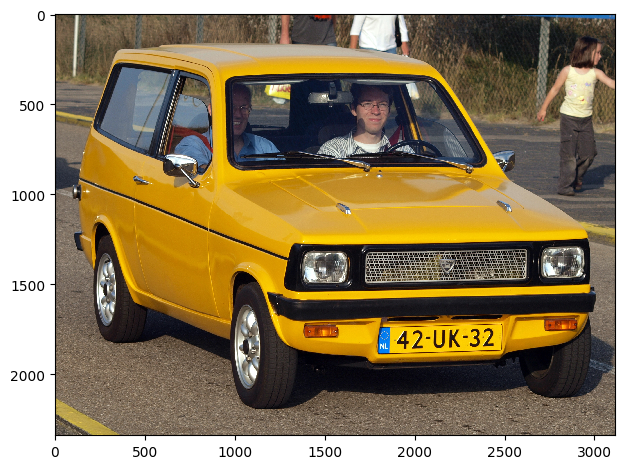

In [16]:
filepath_100 = image_path[100]
img_100 = cv2.imread(filepath_100)
img_100 = io.imread(filepath_100)
px = io.imshow(img_100)


In [17]:
cv2.rectangle(img_100,(1804,1734),(2493,1882),(0,255,0),20)

array([[[ 95,  83,  61],
        [ 94,  82,  60],
        [ 96,  84,  62],
        ...,
        [ 35, 115, 184],
        [ 34, 114, 183],
        [ 34, 114, 183]],

       [[ 98,  86,  64],
        [ 95,  83,  61],
        [ 95,  83,  61],
        ...,
        [ 36, 116, 185],
        [ 34, 114, 183],
        [ 34, 114, 183]],

       [[102,  87,  66],
        [100,  85,  64],
        [ 98,  83,  62],
        ...,
        [ 36, 117, 183],
        [ 32, 112, 181],
        [ 31, 111, 180]],

       ...,

       [[ 93,  90,  75],
        [ 88,  85,  70],
        [ 83,  79,  67],
        ...,
        [110,  97,  80],
        [103,  90,  74],
        [ 99,  86,  70]],

       [[103,  97,  83],
        [ 86,  80,  66],
        [ 65,  61,  49],
        ...,
        [125, 112,  95],
        [119, 106,  90],
        [113,  99,  86]],

       [[116, 110,  96],
        [ 92,  86,  72],
        [ 64,  60,  49],
        ...,
        [135, 122, 105],
        [130, 116, 103],
        [123, 109,  96]]

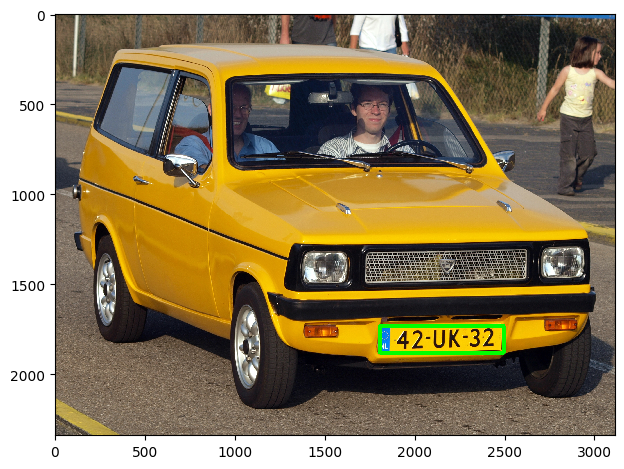

In [18]:
io.imshow(img_100)

Data Preprocessing

1. Each image to be converted to an array using Opencv
2. We will resize image into (224,224) because its standard compatible size of pre trained transfer learning model - inception resent v2
3. We will normalize this image by dividing by 255 and process is called normalization
4. we will normalize our labels between 0 and 1 , need to divide diagnol points by widht and height of image

In [19]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [20]:
labels = df.iloc[:,1:].values # this will create numpy array
output =[]
data = []

In [21]:
labels

array([[1093, 1396,  645,  727],
       [ 134,  301,  312,  350],
       [  31,  139,  128,  161],
       [ 164,  316,  216,  243],
       [ 813, 1067,  665,  724],
       [  66,  154,  166,  197],
       [ 360,  434,  174,  195],
       [ 137,  262,  249,  290],
       [ 207,  356,  174,  287],
       [ 184,  342,  220,  257],
       [ 148,  239,  250,  320],
       [ 131,  187,  130,  144],
       [ 183,  249,  211,  227],
       [  80,  239,  364,  402],
       [ 179,  347,  256,  290],
       [  39,  108,  129,  157],
       [  15,  200,   33,  126],
       [ 157,  316,  226,  278],
       [ 120,  249,  161,  202],
       [ 532,  852,  636,  706],
       [ 180,  559,  216,  314],
       [ 976, 1284,  669,  754],
       [ 647,  736,  332,  387],
       [ 311,  506,  324,  370],
       [ 342,  494,  243,  288],
       [  11,  246,   78,  165],
       [ 165,  328,  276,  324],
       [ 149,  399,  269,  327],
       [  24,  142,  209,  245],
       [  58,  221,  198,  271],
       [ 3

In [22]:
for index in range(len(image_path)):
    image = image_path[index]
    image_array = cv2.imread(image)
    height,width,depth = image_array.shape

    load_image = load_img(image, target_size = (224,224)) # we need to load image in this dimension for incpetion resent
    load_image_array = img_to_array(load_image)

    #Normalize image
    normalize_load_image_array = load_image_array/255.0

    #Normalize label
    xmin,xmax,ymin,ymax = labels[index]
    normalize_xmin,normalize_xmax = xmin/width, xmax/width
    normalize_ymin, normalize_ymax = ymin/height, ymax/height

    label_normalized = (normalize_xmin,normalize_xmax,normalize_ymin,normalize_ymax) #Createa a tuple

    #Appending outputing and data
    data.append(normalize_load_image_array)
    output.append(label_normalized)

In [23]:
X = np.array(data , dtype=np.float32)
y = np.array(output, dtype=np.float32)


In [24]:
X.shape,y.shape

((225, 224, 224, 3), (225, 4))

In [25]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((180, 224, 224, 3), (45, 224, 224, 3), (180, 4), (45, 4))

# Prepare Base Model

A pre-trained model has been previously trained on a dataset and contains the weight and biases 
Inception-ResNet-v2 is a convolution neural network trained on more than million images from ImageNet database

In [26]:
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input

In [27]:
inception_resnet = InceptionResNetV2(weights='imagenet',include_top=False,input_tensor=Input(shape=(224,224,3)))

In [28]:
output_model = inception_resnet.output
output_model = Flatten()(output_model)
output_model = Dense(500,activation='relu')(output_model)
output_model = Dense(250,activation='relu')(output_model)
output_model = Dense(4,activation='sigmoid')(output_model)                                           

In [29]:
model = Model(inputs = inception_resnet.input, outputs = output_model)

In [30]:
model.compile(loss="mse",optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),metrics=["accuracy"])

In [31]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 111, 111, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 111, 111, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 111, 111, 32)         0         ['batch_normalization[0][0

Tensor Board
Is a tool for providing the measurements and visualizations needed during the workflow
It enables tracking experiment metrics like loss and accuracy

In [32]:
tensorboard = TensorBoard('object detection')
history = model.fit(x=X_train, y= Y_train,batch_size=8, epochs=15, validation_data=(X_test,Y_test),callbacks=[tensorboard])

Epoch 1/15
23/23 [==============================] - 232s 6s/step - loss: 0.0353 - accuracy: 0.5222 - val_loss: 0.0216 - val_accuracy: 0.6222
Epoch 2/15
23/23 [==============================] - 146s 6s/step - loss: 0.0186 - accuracy: 0.6167 - val_loss: 0.0185 - val_accuracy: 0.6000
Epoch 3/15
23/23 [==============================] - 153s 7s/step - loss: 0.0133 - accuracy: 0.6778 - val_loss: 0.0166 - val_accuracy: 0.7778
Epoch 4/15
23/23 [==============================] - 117s 5s/step - loss: 0.0096 - accuracy: 0.8333 - val_loss: 0.0119 - val_accuracy: 0.7556
Epoch 5/15
23/23 [==============================] - 99s 4s/step - loss: 0.0043 - accuracy: 0.8556 - val_loss: 0.0097 - val_accuracy: 0.7333
Epoch 6/15
23/23 [==============================] - 98s 4s/step - loss: 0.0038 - accuracy: 0.8889 - val_loss: 0.0076 - val_accuracy: 0.8000
Epoch 7/15
23/23 [==============================] - 102s 4s/step - loss: 0.0029 - accuracy: 0.9167 - val_loss: 0.0097 - val_accuracy: 0.8444
Epoch 8/15
23/2

In [33]:
model.save('anpr_model.h5')

C:\Users\aarti.bhat\Anaconda3\envs\myenv\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Perform Predictions

In [34]:
model = tf.keras.models.load_model('anpr_model.h5')

In [35]:
path = os.path.join(os.getcwd(),"Test","car_image.jpg")

In [36]:
path

'C:\\Users\\aarti.bhat\\OneDrive - Accenture\\Documents\\4.Learning\\26.INueron_DS_Projects\\1.Automatic_Number_Plate_Recognition\\Test\\car_image.jpg'

## Get Original Image

In [37]:
img_orig = cv2.imread(path)

In [38]:
cv2.imshow("car image orig",img_orig)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Get Resized Image

In [39]:
img_resized_224 = cv2.resize(img_orig,(224,224))

In [40]:
cv2.imshow("resized car",img_resized_224)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Get Coordinates of Original Image

In [41]:
h,w,d = img_orig.shape

In [42]:
h,w,d

(148, 237, 3)

## Get Normalized Image for Prediction

In [43]:
img_normalized = img_resized_224/255.0

In [44]:
cv2.imshow("normalized car",img_normalized)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Do the Prediction on Reshaped Normalized Image (1,224,224,3)

In [45]:
img_normalized_reshaped = img_normalized.reshape(1,224,224,3)

In [46]:
coords = model.predict(img_normalized_reshaped)

1/1 [==============================] - 3s 3s/step


In [47]:
coords

array([[0.3439787 , 0.6765661 , 0.63282377, 0.75803465]], dtype=float32)

## Denormalize the Predicted Coordinates

In [48]:
denom = np.array([w,w,h,h])

In [49]:
coords_denom = denom* coords[0]

In [50]:
coord_denorm

NameError: name 'coord_denorm' is not defined

In [ ]:
xmin,xmax,ymin,ymax = coord_denorm[0]

In [ ]:
xmin,xmax,ymin,ymax

In [ ]:
pt1 = (xmin, ymin)

In [ ]:
pt2 = (xmax,ymax)

## Add rectangular image around Original Image

In [ ]:
high_img = cv2.rectangle(img_orig,pt1,pt2,(0,255,0),1)


In [ ]:
cv2.imshow("highlighted car",high_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Saving Image in a folder Predictions

In [ ]:
predictions_path = os.path.join(os.getcwd(),"Predictions")

In [ ]:
predictions_path

In [ ]:
#os.makedirs(predictions_path)

In [ ]:
predictions_file = os.path.join(predictions_path,"car_image.jpg")

In [ ]:
cv2.imwrite(predictions_file,high_img)